In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [3]:
df_Train=pd.read_csv('/kaggle/input/titanic/train.csv')
df_Test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
def bar_chart(feature):
    survived = df_Train[df_Train['Survived']==1][feature].value_counts()
    dead = df_Train[df_Train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

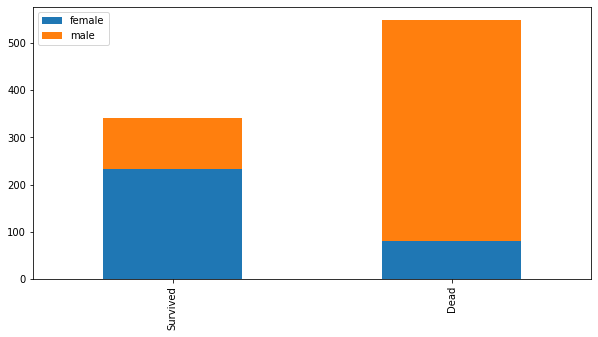

In [9]:
bar_chart('Sex')

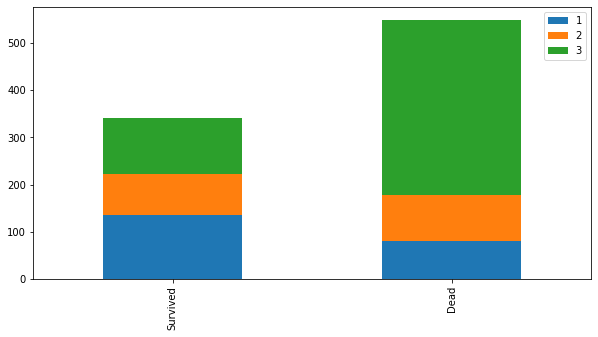

In [10]:
bar_chart('Pclass')

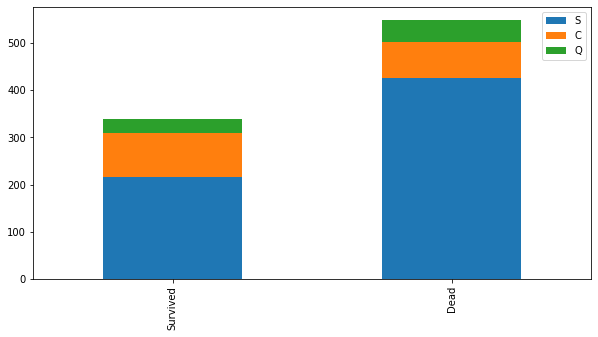

In [11]:
bar_chart('Embarked')

In [12]:
#Deleting unneccesary columns
df_Train.drop('Name', axis=1, inplace=True)
df_Test.drop('Name', axis=1, inplace=True)

In [13]:
df_Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
df_Train.Sex[df_Train.Sex == 'male'] = 1
df_Train.Sex[df_Train.Sex == 'female'] = 2

df_Test.Sex[df_Test.Sex == 'male'] = 1
df_Test.Sex[df_Test.Sex == 'female'] = 2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3

In [16]:
df_Train.Embarked[df_Train.Embarked == 'Q'] = 1
df_Train.Embarked[df_Train.Embarked == 'S'] = 2
df_Train.Embarked[df_Train.Embarked == 'C'] = 3

df_Test.Embarked[df_Test.Embarked == 'Q'] = 1
df_Test.Embarked[df_Test.Embarked == 'S'] = 2
df_Test.Embarked[df_Test.Embarked == 'C'] = 3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [17]:
df_Train['Age']=df_Train['Age'].fillna(df_Train['Age'].mode()[0])
df_Test['Age']=df_Test['Age'].fillna(df_Test['Age'].mode()[0])

df_Train['Embarked']=df_Train['Embarked'].fillna(df_Train['Embarked'].mode()[0])
df_Test['Fare']=df_Test['Fare'].fillna(df_Test['Fare'].mode()[0])

<AxesSubplot:>

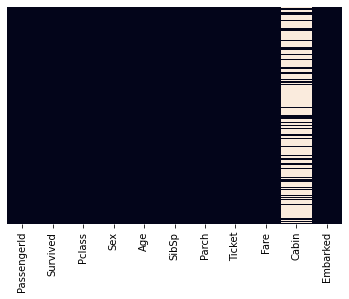

In [18]:
sns.heatmap(df_Train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

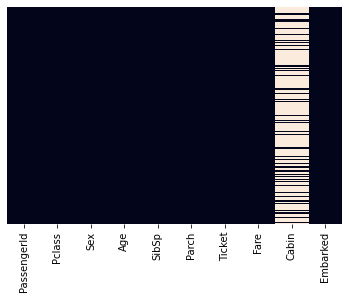

In [19]:
sns.heatmap(df_Test.isnull(),yticklabels=False,cbar=False)

In [20]:
df_Train.drop(['Cabin'],axis=1,inplace=True)
df_Test.drop(['Cabin'],axis=1,inplace=True)

df_Train.drop(['Ticket'],axis=1,inplace=True)
df_Test.drop(['Ticket'],axis=1,inplace=True)

In [21]:
df_Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,2,38.0,1,0,71.2833,3
2,3,1,3,2,26.0,0,0,7.9250,2
3,4,1,1,2,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [22]:
df_Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,2,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,2,22.0,1,1,12.2875,2


In [23]:
df_Train.Fare[df_Train.Fare <= 17] = 1
df_Train.Fare[(df_Train.Fare > 17) & (df_Train.Fare <= 30)] = 2
df_Train.Fare[(df_Train.Fare > 30) & (df_Train.Fare <= 100)] = 3
df_Train.Fare[df_Train.Fare > 100] = 4

df_Test.Fare[df_Test.Fare <= 17] = 1
df_Test.Fare[(df_Test.Fare > 17) & (df_Test.Fare <= 30)] = 2
df_Test.Fare[(df_Test.Fare > 30) & (df_Test.Fare <= 100)] = 3
df_Test.Fare[df_Test.Fare > 100] = 4

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [24]:
df_Train.Age[df_Train.Age <= 16] = 0
df_Train.Age[(df_Train.Age > 16) & (df_Train.Age <= 26)] = 1
df_Train.Age[(df_Train.Age > 26) & (df_Train.Age <= 36)] = 2
df_Train.Age[(df_Train.Age > 36) & (df_Train.Age <= 62)] = 3
df_Train.Age[df_Train.Age > 62] = 4

df_Test.Age[df_Test.Age <= 16] = 0
df_Test.Age[(df_Test.Age > 16) & (df_Test.Age <= 26)] = 1
df_Test.Age[(df_Test.Age > 26) & (df_Test.Age <= 36)] = 2
df_Test.Age[(df_Test.Age > 36) & (df_Test.Age <= 62)] = 3
df_Test.Age[df_Test.Age > 62] = 4

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [25]:
df_Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,1.0,1,0,1.0,2
1,2,1,1,2,3.0,1,0,3.0,3
2,3,1,3,2,1.0,0,0,1.0,2
3,4,1,1,2,2.0,1,0,3.0,2
4,5,0,3,1,2.0,0,0,1.0,2


In [26]:
df_Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,2.0,0,0,1.0,1
1,893,3,2,3.0,1,0,1.0,2
2,894,2,1,3.0,0,0,1.0,1
3,895,3,1,2.0,0,0,1.0,2
4,896,3,2,1.0,1,1,1.0,2


In [27]:
X=df_Train[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=df_Train[['Survived']]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
df_Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [30]:
df_Test.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [31]:
df_Test['Sex'] = df_Test['Sex'].astype(int) 
df_Test['Embarked'] = df_Test['Embarked'].astype(int)
df_Test.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [32]:
df_Test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [33]:
df_Test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,2.0,0,0,1.0,1
1,893,3,2,3.0,1,0,1.0,2
2,894,2,1,3.0,0,0,1.0,1
3,895,3,1,2.0,0,0,1.0,2
4,896,3,2,1.0,1,1,1.0,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,1.0,0,0,1.0,2
414,1306,1,2,3.0,0,0,4.0,3
415,1307,3,1,3.0,0,0,1.0,2
416,1308,3,1,1.0,0,0,1.0,2


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_Test1 = sc.fit_transform(df_Test)
df_Test1

array([[-1.72791209,  0.87348191, -0.75592895, ..., -0.4002477 ,
        -0.77222889, -1.95594094],
       [-1.71962474,  0.87348191,  1.32287566, ..., -0.4002477 ,
        -0.77222889, -0.23108163],
       [-1.71133739, -0.31581919, -0.75592895, ..., -0.4002477 ,
        -0.77222889, -1.95594094],
       ...,
       [ 1.71133739,  0.87348191, -0.75592895, ..., -0.4002477 ,
        -0.77222889, -0.23108163],
       [ 1.71962474,  0.87348191, -0.75592895, ..., -0.4002477 ,
        -0.77222889, -0.23108163],
       [ 1.72791209,  0.87348191, -0.75592895, ...,  0.61989583,
         0.23022973,  1.49377768]])

In [35]:
X.shape

(891, 8)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [38]:
classifier = Sequential()
classifier.add(Dense(units = 20, kernel_initializer = 'he_uniform',activation='relu',input_dim = 8))
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 15, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
model=classifier.fit(X_train, y_train, validation_split=0.350, batch_size = 5, epochs = 100)

Epoch 1/100
93/93 [==============================] - 1s 9ms/step - loss: 0.7574 - accuracy: 0.5218 - val_loss: 0.6641 - val_accuracy: 0.5440
Epoch 2/100
93/93 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.5971 - val_loss: 0.6182 - val_accuracy: 0.6320
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7149 - val_loss: 0.5942 - val_accuracy: 0.6920
Epoch 4/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7145 - val_loss: 0.5740 - val_accuracy: 0.7360
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7554 - val_loss: 0.5595 - val_accuracy: 0.7560
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7417 - val_loss: 0.5476 - val_accuracy: 0.7600
Epoch 7/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7516 - val_loss: 0.5362 - val_accuracy: 0.7680
Epoch 8/100
9

In [40]:
y_pred = classifier.predict(df_Test1)
y_pred = (y_pred > 0.5) #returns values in True / False in a list of lists format

# Converting True and False values to int
y_pred_int = y_pred.astype(int)

# Coverting list of list to 1 flat list
y_pred_list = [item for sublist in y_pred_int for item in sublist]

# Converting the flat list to np array
y_pred1 = np.asarray(y_pred_list , dtype = int)

In [41]:
y_pred1

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [42]:
output = pd.DataFrame({'PassengerId': df_Test.PassengerId, 'Survived': y_pred1})
output.to_csv('my_submission15.csv', index=False)